## WLS state estimation python code by SajjadAsefi - 2020

In [1]:
import numpy as np
import matplotlib.pyplot as plot

In [2]:
# Line Data for B-Bus (Shunt Admittance)Formation.

def bbusppg(num):     # Returns B-bus..

    linedata = linedatas(num);
    fb = linedata[:,0];
    tb = linedata[:,1];
    b = linedata[:,4];
    nbus = np.int(np.max([np.max(fb),np.max(tb)]))    # no. of buses...
    nbranch = len(fb);           # no. of branches...
    bbus = np.mat(np.zeros((nbus,nbus)));

    for k in range (0,nbranch):
        bbus[np.int(fb[k]-1),np.int(tb[k]-1)] = b[k]
        bbus[np.int(tb[k]-1),np.int(fb[k]-1)] = bbus[np.int(fb[k]-1),np.int(tb[k]-1)];

    return bbus

In [3]:
# Traditional Measurement Data..
# Vi - 1, Pi - 2, Qi - 3, Pij - 4, Qij - 5, Iij - 6],

def zdatas(num):

        #      |Msnt |Type | Value | From | To | Rii | 
        #---- Voltage Magnitude ------------#
    zdata14   =  np.mat([[1 , 1  ,  1.06 , 1 ,   0 ,  9e-4],
             #-----------------------------------#
             #---- Real Power Injection ---------#
             [2 , 2  ,  0.1830 ,  2 ,   0 ,  1e-4],
             [3 , 2 ,  -0.9420 ,  3 ,   0 ,  1e-4], 
             [4 , 2 ,   0.00   , 7 ,   0  , 1e-4],
             [5 , 2 ,   0.00   , 8 ,   0  , 1e-4], 
             [6 , 2 ,  -0.0900 , 10 ,   0 ,  1e-4],
             [7 , 2 ,  -0.0350 , 11 ,   0 ,  1e-4],
             [8 , 2 ,  -0.0610 , 12 ,   0 ,  1e-4], 
             [9 , 2 ,  -0.1490 , 14 ,   0 ,  1e-4],
             #------------------------------------#
             #---- Reative Power Injection -------#
             [10 , 3 ,   0.3523 ,  2 ,   0 ,  1e-4],
             [11 , 3 ,   0.0876 ,  3 ,   0 ,  1e-4], 
             [12 , 3 ,   0.00   , 7 ,   0  , 1e-4],
             [13 , 3 ,   0.2103 ,  8 ,   0 ,  1e-4], 
             [14 , 3 ,  -0.0580 , 10 ,   0 ,  1e-4],
             [15 , 3 ,  -0.0180 , 11 ,   0 ,  1e-4],
             [16 , 3 ,  -0.0160 , 12 ,   0 ,  1e-4], 
             [17 , 3 ,  -0.0500 , 14 ,   0 ,  1e-4],
             #------------------------------------#
             #------ Real Power Flow ------------- #
             [18 , 4 ,   1.5708 ,  1 ,   2 ,  64e-6],
             [19 , 4 ,   0.7340 ,  2 ,   3 ,  64e-6],
             [20 , 4 ,  -0.5427 ,  4 ,   2 ,  64e-6],
             [21 , 4 ,   0.2707 ,  4 ,   7 ,  64e-6],
             [22 , 4 ,   0.1546 ,  4 ,   9 ,  64e-6],
             [23 , 4 ,  -0.4081 ,  5 ,   2 ,  64e-6],
             [24 , 4 ,   0.6006 ,  5 ,   4 ,  64e-6],
             [25 , 4 ,   0.4589 ,  5 ,   6 ,  64e-6],
             [26 , 4 ,   0.1834 ,  6 ,  13 ,  64e-6],
             [27 , 4 ,   0.2707 ,  7 ,   9 ,  64e-6],
             [28 , 4 ,  -0.0816 , 11 ,   6 ,  64e-6],
             [29 , 4 ,   0.0188 , 12 ,  13 ,  64e-6],
             #------------------------------------#
             #------ Reactive Power Flow -------- #
             [30 , 5 ,  -0.1748 ,  1 ,   2 ,  64e-6],
             [31 , 5 ,   0.0594 ,  2 ,   3 ,  64e-6],
             [32 , 5 ,   0.0213 ,  4 ,   2 ,  64e-6],
             [33 , 5 ,  -0.1540 ,  4 ,   7 ,  64e-6],
             [34 , 5 ,  -0.0264 ,  4 ,   9 ,  64e-6],
             [35 , 5 ,  -0.0193 ,  5 ,   2 ,  64e-6],
             [36 , 5 ,  -0.1006 ,  5 ,   4 ,  64e-6],
             [37 , 5 ,  -0.2084 ,  5 ,   6 ,  64e-6],
             [38 , 5 ,   0.0998 ,  6 ,  13 ,  64e-6],
             [39 , 5 ,   0.1480 ,  7 ,   9 ,  64e-6],
             [40 , 5 ,  -0.0864 , 11 ,   6 ,  64e-6],
             [41 , 5 ,   0.0141 , 12 ,  13 ,  64e-6]]);
             #--------------------------------------#

    # Just in case you want to add other systems, add the data above 
    # and change the following condition accordingly
    if num == 3:
        zdt =zdata3;
    elif num==14:
        zdt = zdata14;
    elif num==30:
        zdt = zdata30
        
             
    return zdt

In [4]:
# Line data function

def  linedatas(num):

    # ,    |  From |  To   |   R     |   X     |     B/2  |  X'mer  |
    # ,    |  Bus  | Bus   |  pu     |  pu     |     pu   | TAP (a) |
    linedat14 = np.mat([[1 ,   2 ,  0.01938  , 0.05917  ,  0.0264 ,    1],
                       [1 ,    5 ,  0.05403  , 0.22304  ,  0.0246 ,    1],
                       [2 ,    3 ,  0.04699  , 0.19797  ,  0.0219 ,    1],
                       [2 ,    4 ,  0.05811  , 0.17632  ,  0.0170 ,    1],
                       [2 ,    5 ,  0.05695  , 0.17388  ,  0.0173 ,    1],
                       [3 ,    4 ,  0.06701  , 0.17103  ,  0.0064 ,    1],
                       [4 ,    5 ,  0.01335  , 0.04211  ,  0.0    ,    1],
                       [4 ,    7 ,  0.0      , 0.20912  ,  0.0 ,   0.978],
                       [4 ,    9 ,  0.0      , 0.55618  ,  0.0 ,   0.969],
                       [5 ,    6 ,  0.0      , 0.25202  ,  0.0 ,   0.932],
                       [6 ,    11,  0.09498  , 0.19890  ,  0.0 ,       1],
                       [6 ,    12,  0.12291  , 0.25581  ,  0.0 ,       1],
                       [6 ,    13,  0.06615  , 0.13027  ,  0.0 ,       1],
                       [7 ,    8 ,  0.0      , 0.17615  ,  0.0 ,       1],
                       [7 ,    9 ,  0.0      , 0.11001  ,  0.0 ,       1],
                       [9 ,    10,  0.03181  , 0.08450  ,  0.0 ,       1],
                       [9 ,    14,  0.12711  , 0.27038  ,  0.0 ,       1],
                       [10 ,   11,  0.08205  , 0.19207  ,  0.0 ,       1],
                       [12 ,   13,  0.22092  , 0.19988  ,  0.0 ,       1],
                       [13 ,   14,  0.17093  , 0.34802  ,  0.0 ,       1]]);


    if num == 3:
        linedt = linedat3;
    elif num==14: 
        linedt = linedat14;
    elif num==30:
        linedt = linedat30;
        
             
    return linedt

In [5]:
# Returns ybus
def ybusppg(num):  

    linedata = linedatas(num); # Calling "linedata6.m" for Line Data...
    fb = linedata[:,0];     # From bus number...
    tb = linedata[:,1];     # To bus number...
    r = linedata[:,2];      # Resistance, R...
    x = linedata[:,3];      # Reactance, X...
    b = linedata[:,4];      # Ground Admittance, B/2...
    a = linedata[:,5];      # Tap setting value..
    z = r + x*1j;            # Z matrix...
    y = 1/z;               # To get inverse of each element...
    b = b*1j;                # Make B imaginary...

    nbus = np.int(np.max([np.max(fb),np.max(tb)]));    # no. of buses...
    nbranch = len(fb) # no. of branches...
    ybus = np.mat(np.zeros((nbus,nbus), dtype=complex));       # Initialise YBus...
    
    # Formation of the Off Diagonal Elements...
    for k in range (0,nbranch):
        ybus[np.int(fb[k]-1),np.int(tb[k]-1)] =ybus[np.int(fb[k]-1),np.int(tb[k]-1)]- (y[k]/a[k]);
        ybus[np.int(tb[k]-1),np.int(fb[k]-1)] = ybus[np.int(fb[k]-1),np.int(tb[k]-1)];
 
 
    # Formation of Diagonal Elements....
    for m in range (0,nbus):
        for n in range (0,nbranch):
            if fb[n]-1 == m:
                ybus[m,m]=ybus[m,m]+ (y[n]/(a[n]**2)) + b[n]
            elif tb[n]-1 ==m:
                ybus[m,m]=ybus[m,m]+y[n]
                

    return ybus

The tolerance value is:  1.1595193778660029e-05
The iteration number is:  6


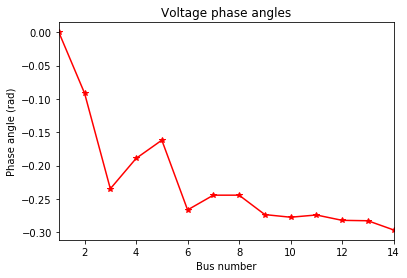

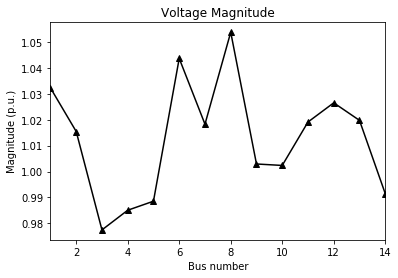

In [8]:
# The main code for state estimation using WLS

num=14;
ybus = ybusppg(num); # Get YBus..
zdata = zdatas(num); # Get Measurement data..
bpq = bbusppg(num); # Get B data..
nbus = np.int(np.max([np.max(zdata[:,3]),np.max(zdata[:,4])])); # Get number of buses..
type1 = zdata[:,1]; # Type of measurement, Vi - 1, Pi - 2, Qi - 3, Pij - 4, Qij - 5, Iij - 6..
z = zdata[:,2]; # Measuement values..
fbus = zdata[:,3]; # From bus..
tbus = zdata[:,4]; # To bus..
Ri = np.diagflat(zdata[:,5]) # Measurement Error..
V = np.ones((nbus,1)) # Initialize the bus voltages..
del1 = np.zeros((nbus,1)); # Initialize the bus angles..
E = np.matrix(np.concatenate((del1[1:], V)))
G = ybus.real;
B = ybus.imag

vi = np.mat((type1 == 1).nonzero())[0,:]; # Index of measurements..
ppi = np.mat((type1 == 2).nonzero())[0,:];
qi = np.mat((type1 == 3).nonzero())[0,:]
pf = np.mat((type1 == 4).nonzero())[0,:]
qf = np.mat((type1 == 5).nonzero())[0,:]

nvi = vi.shape[1]; # Number of Voltage measurements..
npi = ppi.shape[1]; # Number of Real Power Injection measurements..
nqi = qi.shape[1]; # Number of Reactive Power Injection measurements..
npf = pf.shape[1]; # Number of Real Power Flow measurements..
nqf = qf.shape[1]; # Number of Reactive Power Flow measurements..

iter = 1;
tol = 5;

while tol>1e-4:
    #Measurement Function, h
    h1 = np.mat(V[np.int(fbus[vi])-1,0]);
    h2 = np.mat(np.zeros((npi,1)));
    h3 = np.mat(np.zeros((nqi,1)));
    h4 = np.mat(np.zeros((npf,1)));
    h5 = np.mat(np.zeros(((nqf,1))));

    for i in range(0,npi):
        m = np.int(fbus[(ppi[0,i])])-1
        for k in range(0,nbus):
            h2[i] += V[m]*V[k]*(G[m,k]*np.cos(del1[m]-del1[k]) + B[m,k]*np.sin(del1[m]-del1[k]))
    
    for i in range(0,nqi):
        m = np.int(fbus[(qi[0,i])])-1
        for k in range(0,nbus):
            h3[i] += V[m]*V[k]*((G[m,k]*np.sin(del1[m]-del1[k])) - (B[m,k]*np.cos(del1[m]-del1[k])))
            
    for i in range(0,npf):
        m = np.int(fbus[(pf[0,i])])-1
        n = np.int(tbus[(pf[0,i])])-1
        h4[i] = -(V[m]**2)*G[m,n] - V[m]*V[n]*(-G[m,n]*np.cos(del1[m]-del1[n]) - B[m,n]*np.sin(del1[m]-del1[n]))
    
    for i in range(0,nqf):
        m = np.int(fbus[(qf[0,i])])-1
        n = np.int(tbus[(qf[0,i])])-1
        h5[i] = -(V[m]**2)*(-B[m,n]+bpq[m,n]) - V[m]*V[n]*(-G[m,n]*np.sin(del1[m]-del1[n]) + B[m,n]*np.cos(del1[m]-del1[n]))
    
    h=np.mat(np.concatenate((h1,h2,h3,h4,h5)))
    
    # residual
    r = z - h
    
    # Jacobian
    H11=np.mat(np.zeros((nvi,nbus-1)))
    
    H12=np.mat(np.zeros((nvi,nbus)))
    for k in range(0,nvi):
        for n in range(0,nvi):
            if n == k:
                H12[k,n]=1
    
    H21=np.mat(np.zeros((npi,nbus-1)))
    for i in range(0,npi):
        m = np.int(fbus[(ppi[0,i])])-1
        for k in range(0,nbus-1):
            if k+1 == m:
                for n in range(0,nbus):
                    H21[i,k] += V[m]*V[n]*(-G[m,n]*np.sin(del1[m]-del1[n]) + B[m,n]*np.cos(del1[m]-del1[n]))
                H21[i,k] -= (V[m]**2)*B[m,m]
            else:
                H21[i,k]=V[m]*V[k+1]*(G[m,k+1]*np.sin(del1[m]-del1[k+1]) - B[m,k+1]*np.cos(del1[m]-del1[k+1]))
    
    H22=np.mat(np.zeros((npi,nbus)))
    for i in range(0,npi):
        m = np.int(fbus[(ppi[0,i])])-1
        for k in range(0,nbus):
            if k == m:
                for n in range(0,nbus):
                    H22[i,k] += V[n]*(G[m,n]*np.cos(del1[m]-del1[n]) + B[m,n]*np.sin(del1[m]-del1[n]))
                H22[i,k] += V[m]*G[m,m]
            else:
                H22[i,k]=V[m]*(G[m,k]*np.cos(del1[m]-del1[k]) + B[m,k]*np.sin(del1[m]-del1[k]))
    
    H31=np.mat(np.zeros((nqi,nbus-1)))
    for i in range(0,nqi):
        m = np.int(fbus[(qi[0,i])])-1
        for k in range(0,nbus-1):
            if k+1 == m:
                for n in range(0,nbus):
                    H31[i,k] += V[m]*V[n]*(G[m,n]*np.cos(del1[m]-del1[n]) + B[m,n]*np.sin(del1[m]-del1[n]))
                H31[i,k] -= (V[m]**2)*G[m,m]
            else:
                H31[i,k]=V[m]*V[k+1]*(-G[m,k+1]*np.cos(del1[m]-del1[k+1]) - B[m,k+1]*np.sin(del1[m]-del1[k+1]))

    H32=np.mat(np.zeros((nqi,nbus)))
    for i in range(0,nqi):
        m = np.int(fbus[(qi[0,i])])-1
        for k in range(0,nbus):
            if k == m:
                for n in range(0,nbus):
                    H32[i,k] += V[n]*(G[m,n]*np.sin(del1[m]-del1[n]) - B[m,n]*np.cos(del1[m]-del1[n]))
                H32[i,k] -= V[m]*B[m,m]
            else:
                H32[i,k]=V[m]*(G[m,k]*np.sin(del1[m]-del1[k]) - B[m,k]*np.cos(del1[m]-del1[k]))
    
    H41=np.mat(np.zeros((npf,nbus-1)))
    for i in range(0,npf):
        m = np.int(fbus[(pf[0,i])])-1
        n = np.int(tbus[(pf[0,i])])-1
        for k in range(0,nbus-1):
            if k+1 == m:
                H41[i,k] = V[m]*V[n]*(-G[m,n]*np.sin(del1[m]-del1[n]) + B[m,n]*np.cos(del1[m]-del1[n]))
            elif k+1 == n:
                H41[i,k] = -V[m]*V[n]*(-G[m,n]*np.sin(del1[m]-del1[n]) + B[m,n]*np.cos(del1[m]-del1[n]))
            else:
                H41[i,k] = 0
    
    H42=np.mat(np.zeros((npf,nbus)))
    for i in range(0,npf):
        m = np.int(fbus[(pf[0,i])])-1
        n = np.int(tbus[(pf[0,i])])-1
        for k in range(0,nbus):
            if k == m:
                H42[i,k] = -V[n]*(-G[m,n]*np.cos(del1[m]-del1[n]) - B[m,n]*np.sin(del1[m]-del1[n])) -2*G[m,n]*V[m]
            elif k == n:
                H42[i,k] = -V[m]*(-G[m,n]*np.cos(del1[m]-del1[n]) - B[m,n]*np.sin(del1[m]-del1[n]))
            else:
                H42[i,k] = 0
    
    H51=np.mat(np.zeros((nqf,nbus-1)))
    for i in range(0,nqf):
        m = np.int(fbus[(qf[0,i])])-1
        n = np.int(tbus[(qf[0,i])])-1
        for k in range(0,nbus-1):
            if k+1 == m:
                H51[i,k] = -V[m]*V[n]*(-G[m,n]*np.cos(del1[m]-del1[n]) - B[m,n]*np.sin(del1[m]-del1[n]))
            elif k+1 == n:
                H51[i,k] = V[m]*V[n]*(-G[m,n]*np.cos(del1[m]-del1[n]) - B[m,n]*np.sin(del1[m]-del1[n]))
            else:
                H51[i,k] = 0
    
    H52=np.mat(np.zeros((nqf,nbus)))
    for i in range(0,nqf):
        m = np.int(fbus[(qf[0,i])])-1
        n = np.int(tbus[(qf[0,i])])-1
        for k in range(0,nbus):
            if k == m:
                H52[i,k] = -V[n]*(-G[m,n]*np.sin(del1[m]-del1[n]) + B[m,n]*np.cos(del1[m]-del1[n])) -2*V[m]*(-B[m,n]+bpq[m,n])
            elif k == n:
                H52[i,k] = -V[m]*(-G[m,n]*np.sin(del1[m]-del1[n]) + B[m,n]*np.cos(del1[m]-del1[n]))
            else:
                H52[i,k] = 0

    H1=np.mat(np.concatenate((H11,H12),axis=1))
    H2=np.mat(np.concatenate((H21,H22),axis=1))
    H3=np.mat(np.concatenate((H31,H32),axis=1))
    H4=np.mat(np.concatenate((H41,H42),axis=1))
    H5=np.mat(np.concatenate((H51,H52),axis=1))

    H=np.mat(np.concatenate((H1,H2,H3,H4,H5)))
            
    # Gain matrix
    Gm = np.transpose(H)*np.linalg.inv(Ri)*H
    
    dE = np.linalg.inv(Gm)*(np.transpose(H)*np.linalg.inv(Ri)*r)
    E=E+dE
    
    del1[1:] = E[0:nbus-1]
    V=E[nbus-1:]
    
    iter=iter+1
    tol=np.max(np.abs(dE))

# ++++++++++++++++++++++
# Presenting the results
# ======================

print('The tolerance value is: ',tol)
print('The iteration number is: ',iter)

plot.figure()
plot.plot(range(1,nbus+1),del1,'-r*')
plot.title('Voltage phase angles')
plot.xlabel('Bus number')
plot.ylabel('Phase angle (rad)')
plot.xlim(1,nbus)

plot.figure()
plot.plot(range(1,nbus+1),V,'-k^')
plot.title('Voltage Magnitude')
plot.xlabel('Bus number')
plot.ylabel('Magnitude (p.u.)')
plot.xlim(1,nbus+5)
plot.show()